In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gene_expression.csv', header= 0)

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [6]:
df.duplicated().sum()

862

In [7]:
df.shape

(3000, 3)

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(2138, 3)

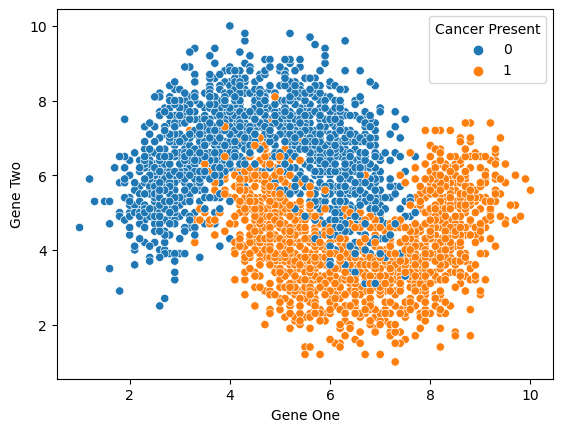

In [10]:
sns.scatterplot(x = 'Gene One' , y = 'Gene Two', hue = 'Cancer Present', data = df)
plt.show()

In [11]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 9)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train

array([[-0.53742734, -0.53069698],
       [-0.21574223,  1.19687171],
       [-1.66332524,  0.04515925],
       ...,
       [ 1.33906916,  0.39067299],
       [ 0.26678544, -0.64586823],
       [ 1.71436846, -1.04896759]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV 
cv_classifier = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'accuracy')
cv_classifier.fit(x_train, y_train)
cv_classifier.best_params_

{'n_neighbors': 21}

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)

y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test)) 

from sklearn.model_selection import cross_val_score
print("cross validation score:", cross_val_score(knn,X,y,cv = 5).mean())

Train accuracy: 0.9233918128654971
Test accuracy: 0.9158878504672897
cross validation score: 0.9195353367331304


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[186,  14],
       [ 22, 206]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       200
           1       0.94      0.90      0.92       228

    accuracy                           0.92       428
   macro avg       0.92      0.92      0.92       428
weighted avg       0.92      0.92      0.92       428



# prediction on new data 

new Data

In [57]:
df = pd.DataFrame({"Gene One": [4.9], "Gene Two": [3.9]})
df

,Gene One,Gene Two
0,4.9,3.9


* preprocess the new data

In [58]:
df_scaled = scaler.transform(df)

* use KNN model to predict on new data

In [61]:
knn.predict(df_scaled)[0]

1